In [1]:
!pip install nltk

# Tokenization

In [2]:
corpus = "Hi I am vaibhav's.I Love coding! ,I am exploring AI everyday."

In [3]:
corpus

"Hi I am vaibhav's.I Love coding! ,I am exploring AI everyday."

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
#Tokinize
# paragraph --> Sentence
from nltk.tokenize import sent_tokenize
doc1 = sent_tokenize(corpus)
print(doc1)

["Hi I am vaibhav's.I Love coding!", ',I am exploring AI everyday.']


In [6]:
#Tokinize
# Sentence into words
from nltk.tokenize import word_tokenize
doc2 = word_tokenize(corpus)
print(doc2)

['Hi', 'I', 'am', "vaibhav's.I", 'Love', 'coding', '!', ',', 'I', 'am', 'exploring', 'AI', 'everyday', '.']


In [7]:
#Tokinize
for sentence in doc1:
  print(word_tokenize(sentence))

['Hi', 'I', 'am', "vaibhav's.I", 'Love', 'coding', '!']
[',', 'I', 'am', 'exploring', 'AI', 'everyday', '.']


In [8]:
#Tokinize
# paragraph --> words
# sentence  --> words
# wordpunct_tokenize --> it splited each and every words like -> ` , '
from nltk.tokenize import wordpunct_tokenize
for sentence in doc1:
  print(wordpunct_tokenize(sentence))

['Hi', 'I', 'am', 'vaibhav', "'", 's', '.', 'I', 'Love', 'coding', '!']
[',', 'I', 'am', 'exploring', 'AI', 'everyday', '.']


# Stemming And Its Types -  Text Preprocessing

**Stemming** : Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma.Stemming is important in natural language understanding(NLU) and Natural Language Processing(NLP).

Usecase : Stemming use for email spam or Ham

In [9]:
## Classification Problem
## Comments of product is a positive review or negative review
## Reviews ----> eating, eat, eaten   [going,gone,goes]
words=["eating","eats","eaten","writing","writes","programming","programs","history","finally","finalized"]

##PorterStemmer

In [10]:
from nltk.stem import PorterStemmer
stemming = PorterStemmer()
for word in words:
  print(word + "---->"+stemming.stem(word))

eating---->eat
eats---->eat
eaten---->eaten
writing---->write
writes---->write
programming---->program
programs---->program
history---->histori
finally---->final
finalized---->final


In [11]:
stemming.stem('congratulations')

'congratul'

In [12]:
stemming.stem('sitting')

'sit'

**RegexpStemmer class** : NLTK has RegexStemmer class with the help of which we can easily implement Regular Expression Stemmer algorithms. It basically takes a single regular expression and removes any prefix or suffix that matches the expression.Let us see an example.

In [13]:
from nltk.stem import RegexpStemmer

In [14]:
reg_stemmer = RegexpStemmer('ing$|s$|e$|able$',min=4)

In [15]:
reg_stemmer.stem('eating')

'eat'

In [16]:
reg_stemmer.stem('ingeating')

'ingeat'

# Snowball Stemmer

In [17]:
from nltk.stem import SnowballStemmer

In [18]:
snowballstemmer = SnowballStemmer('english')

In [19]:
for word in words:
  print(word+ "----->"+snowballstemmer.stem(word))

eating----->eat
eats----->eat
eaten----->eaten
writing----->write
writes----->write
programming----->program
programs----->program
history----->histori
finally----->final
finalized----->final


In [20]:
stemming.stem("fairly"),stemming.stem("sportingly") # It give result but not as expected so snowballstemmer comes into in picture

('fairli', 'sportingli')

In [21]:
snowballstemmer.stem("fairly"),snowballstemmer.stem("sportingly") # Snowballstemmer give good output as compare to PorterStemmer

('fair', 'sport')

In [22]:
snowballstemmer.stem('goes')

'goe'

In [23]:
stemming.stem("goes")

'goe'

# Wordnet Lemmatizer
Lemmatization techinque is like stemming. The output we will get after lemmatization is call 'lemma', Which is a root word rather than root stem,the output of stemming. After lemmatization,we will be geeting a valid word that means the same thing.

NLTK provides WordNetLemmatizer class which is a thin wrapper around the wordnet corpus.This class uses morphy() function to the WordNet CorpusReader class to find a lemma. Let us understand ot with an example -

In [24]:
## Q & A ,CHATBOTS,TEXT SUMMARZIZATION
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [25]:
lemmatizer = WordNetLemmatizer()

In [26]:
'''
POS- Noun-n
verb-v
adjective-a
adverb-r
'''
# below we are passing pos='n',pos='v',pos='a',pos='r'
lemmatizer.lemmatize("going",pos='n')

'going'

In [27]:
words=["eating","eats","eaten","writing","writes","programming","programs","history","finally","finalized"]

In [28]:
for word in words:
  print(word + "---->"+lemmatizer.lemmatize(word,pos='v')) # change pos=  and see changes

eating---->eat
eats---->eat
eaten---->eat
writing---->write
writes---->write
programming---->program
programs---->program
history---->history
finally---->finally
finalized---->finalize


In [29]:
lemmatizer.lemmatize('goes',pos='v')

'go'

In [30]:
lemmatizer.lemmatize('fairly',pos='v'),lemmatizer.lemmatize('sportingly')

('fairly', 'sportingly')

# Stop Words

In [31]:
## Speech Of DR APJ Abdul Kalam
paragraph = """I have three visions for India. In 3000 years of our history, people from all over
               the world have come and invaded us, captured our lands, conquered our minds.
               From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,
               the French, the Dutch, all of them came and looted us, took over what was ours.
               Yet we have not done this to any other nation. We have not conquered anyone.
               We have not grabbed their land, their culture,
               their history and tried to enforce our way of life on them.
               Why? Because we respect the freedom of others.That is why my
               first vision is that of freedom. I believe that India got its first vision of
               this in 1857, when we started the War of Independence. It is this freedom that
               we must protect and nurture and build on. If we are not free, no one will respect us.
               My second vision for India’s development. For fifty years we have been a developing nation.
               It is time we see ourselves as a developed nation. We are among the top 5 nations of the world
               in terms of GDP. We have a 10 percent growth rate in most areas. Our poverty levels are falling.
               Our achievements are being globally recognised today. Yet we lack the self-confidence to
               see ourselves as a developed nation, self-reliant and self-assured. Isn’t this incorrect?
               I have a third vision. India must stand up to the world. Because I believe that unless India
               stands up to the world, no one will respect us. Only strength respects strength. We must be
               strong not only as a military power but also as an economic power. Both must go hand-in-hand.
               My good fortune was to have worked with three great minds. Dr. Vikram Sarabhai of the Dept. of
               space, Professor Satish Dhawan, who succeeded him and Dr. Brahm Prakash, father of nuclear material.
               I was lucky to have worked with all three of them closely and consider this the great opportunity of my life.
               I see four milestones in my career"""

In [32]:
from nltk.stem import PorterStemmer

In [33]:
from nltk.corpus import stopwords

In [34]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [35]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
from nltk.stem import PorterStemmer

In [37]:
stemmer = PorterStemmer()

In [38]:
sentences = nltk.sent_tokenize(paragraph)

In [39]:
type(sentences)

list

In [40]:
## Apply Stopwords And Filter And then Apply Stemming

for i in range(len(sentences)):
  words = nltk.word_tokenize(sentences[i])
  words = [stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))] # remove all stopword
  sentences[i] = ' '.join(words) # converting all the list of words into sentences


In [41]:
sentences

['i three vision india .',
 'in 3000 year histori , peopl world come invad us , captur land , conquer mind .',
 'from alexand onward , greek , turk , mogul , portugues , british , french , dutch , came loot us , took .',
 'yet done nation .',
 'we conquer anyon .',
 'we grab land , cultur , histori tri enforc way life .',
 'whi ?',
 'becaus respect freedom others.that first vision freedom .',
 'i believ india got first vision 1857 , start war independ .',
 'it freedom must protect nurtur build .',
 'if free , one respect us .',
 'my second vision india ’ develop .',
 'for fifti year develop nation .',
 'it time see develop nation .',
 'we among top 5 nation world term gdp .',
 'we 10 percent growth rate area .',
 'our poverti level fall .',
 'our achiev global recognis today .',
 'yet lack self-confid see develop nation , self-reli self-assur .',
 'isn ’ incorrect ?',
 'i third vision .',
 'india must stand world .',
 'becaus i believ unless india stand world , one respect us .',
 'onl

In [42]:
## Apply SnowballStemmer
from nltk.stem import SnowballStemmer
snowballstemmer = SnowballStemmer('english')
sentences = nltk.sent_tokenize(paragraph)
## Apply Stopwords And Filter And then Apply SnowballStemmer

for i in range(len(sentences)):
  words = nltk.word_tokenize(sentences[i])
  words = [snowballstemmer.stem(word) for word in words if word not in set(stopwords.words('english'))] # remove all stopword
  sentences[i] = ' '.join(words) # converting all the list of words into sentences

In [43]:
sentences

['i three vision india .',
 'in 3000 year histori , peopl world come invad us , captur land , conquer mind .',
 'from alexand onward , greek , turk , mogul , portugues , british , french , dutch , came loot us , took .',
 'yet done nation .',
 'we conquer anyon .',
 'we grab land , cultur , histori tri enforc way life .',
 'whi ?',
 'becaus respect freedom others.that first vision freedom .',
 'i believ india got first vision 1857 , start war independ .',
 'it freedom must protect nurtur build .',
 'if free , one respect us .',
 'my second vision india ’ develop .',
 'for fifti year develop nation .',
 'it time see develop nation .',
 'we among top 5 nation world term gdp .',
 'we 10 percent growth rate area .',
 'our poverti level fall .',
 'our achiev global recognis today .',
 'yet lack self-confid see develop nation , self-reli self-assur .',
 'isn ’ incorrect ?',
 'i third vision .',
 'india must stand world .',
 'becaus i believ unless india stand world , one respect us .',
 'onl

In [44]:
## Apply WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
sentences = nltk.sent_tokenize(paragraph)
for i in range(len(sentences)):
  words = nltk.word_tokenize(sentences[i])
  words = [lemmatizer.lemmatize(word.lower(),pos='v') for word in words if word not in set(stopwords.words('english'))] # remove all stopword
  sentences[i] = ' '.join(words) # converting all the list of words into sentences


In [45]:
sentences

['i three visions india .',
 'in 3000 years history , people world come invade us , capture land , conquer mind .',
 'from alexander onwards , greeks , turks , moguls , portuguese , british , french , dutch , come loot us , take .',
 'yet do nation .',
 'we conquer anyone .',
 'we grab land , culture , history try enforce way life .',
 'why ?',
 'because respect freedom others.that first vision freedom .',
 'i believe india get first vision 1857 , start war independence .',
 'it freedom must protect nurture build .',
 'if free , one respect us .',
 'my second vision india ’ development .',
 'for fifty years develop nation .',
 'it time see develop nation .',
 'we among top 5 nations world term gdp .',
 'we 10 percent growth rate areas .',
 'our poverty level fall .',
 'our achievements globally recognise today .',
 'yet lack self-confidence see develop nation , self-reliant self-assured .',
 'isn ’ incorrect ?',
 'i third vision .',
 'india must stand world .',
 'because i believe unle

# Parts Of Speech Tags

"Taj Mahal is a beautiful Monument"

CC coordinating conjunction
CD cardinal digit
DT determiner
EX existential there (like: “there is” … think of it like “there exists”)
FW foreign word
IN preposition/subordinating conjunction
JJ adjective – ‘big’
JJR adjective, comparative – ‘bigger’
JJS adjective, superlative – ‘biggest’
LS list marker 1)
MD modal – could, will
NN noun, singular ‘- desk’
NNS noun plural – ‘desks’
NNP proper noun, singular – ‘Harrison’
NNPS proper noun, plural – ‘Americans’
PDT predeterminer – ‘all the kids’
POS possessive ending parent’s
PRP personal pronoun –  I, he, she
PRP$ possessive pronoun – my, his, hers
RB adverb – very, silently,
RBR adverb, comparative – better
RBS adverb, superlative – best
RP particle – give up
TO – to go ‘to’ the store.
UH interjection – errrrrrrrm
VB verb, base form – take
VBD verb, past tense – took
VBG verb, gerund/present participle – taking
VBN verb, past participle – taken
VBP verb, sing. present, non-3d – take
VBZ verb, 3rd person sing. present – takes
WDT wh-determiner – which
WP wh-pronoun – who, what
WP$ possessive wh-pronoun, eg- whose
WRB wh-adverb, eg- where, when

In [46]:
## Speech Of DR APJ Abdul Kalam
paragraph = """I have three visions for India. In 3000 years of our history, people from all over
               the world have come and invaded us, captured our lands, conquered our minds.
               From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,
               the French, the Dutch, all of them came and looted us, took over what was ours.
               Yet we have not done this to any other nation. We have not conquered anyone.
               We have not grabbed their land, their culture,
               their history and tried to enforce our way of life on them.
               Why? Because we respect the freedom of others.That is why my
               first vision is that of freedom. I believe that India got its first vision of
               this in 1857, when we started the War of Independence. It is this freedom that
               we must protect and nurture and build on. If we are not free, no one will respect us.
               My second vision for India’s development. For fifty years we have been a developing nation.
               It is time we see ourselves as a developed nation. We are among the top 5 nations of the world
               in terms of GDP. We have a 10 percent growth rate in most areas. Our poverty levels are falling.
               Our achievements are being globally recognised today. Yet we lack the self-confidence to
               see ourselves as a developed nation, self-reliant and self-assured. Isn’t this incorrect?
               I have a third vision. India must stand up to the world. Because I believe that unless India
               stands up to the world, no one will respect us. Only strength respects strength. We must be
               strong not only as a military power but also as an economic power. Both must go hand-in-hand.
               My good fortune was to have worked with three great minds. Dr. Vikram Sarabhai of the Dept. of
               space, Professor Satish Dhawan, who succeeded him and Dr. Brahm Prakash, father of nuclear material.
               I was lucky to have worked with all three of them closely and consider this the great opportunity of my life.
               I see four milestones in my career"""

In [47]:
from nltk.corpus import stopwords
sentences = nltk.sent_tokenize(paragraph)

In [48]:
sentences

['I have three visions for India.',
 'In 3000 years of our history, people from all over\n               the world have come and invaded us, captured our lands, conquered our minds.',
 'From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,\n               the French, the Dutch, all of them came and looted us, took over what was ours.',
 'Yet we have not done this to any other nation.',
 'We have not conquered anyone.',
 'We have not grabbed their land, their culture,\n               their history and tried to enforce our way of life on them.',
 'Why?',
 'Because we respect the freedom of others.That is why my\n               first vision is that of freedom.',
 'I believe that India got its first vision of\n               this in 1857, when we started the War of Independence.',
 'It is this freedom that\n               we must protect and nurture and build on.',
 'If we are not free, no one will respect us.',
 'My second vision for India’s development.'

In [49]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [50]:
## We will find the Pos Tag
for i in range(len(sentences)):
  words = nltk.word_tokenize(sentences[i])
  words = [word for word in words if word not in set(stopwords.words('english'))]
  pos_tag = nltk.pos_tag(words)
  print(pos_tag)


[('I', 'PRP'), ('three', 'CD'), ('visions', 'NNS'), ('India', 'NNP'), ('.', '.')]
[('In', 'IN'), ('3000', 'CD'), ('years', 'NNS'), ('history', 'NN'), (',', ','), ('people', 'NNS'), ('world', 'NN'), ('come', 'VBP'), ('invaded', 'VBN'), ('us', 'PRP'), (',', ','), ('captured', 'VBD'), ('lands', 'NNS'), (',', ','), ('conquered', 'VBD'), ('minds', 'NNS'), ('.', '.')]
[('From', 'IN'), ('Alexander', 'NNP'), ('onwards', 'NNS'), (',', ','), ('Greeks', 'NNP'), (',', ','), ('Turks', 'NNP'), (',', ','), ('Moguls', 'NNP'), (',', ','), ('Portuguese', 'NNP'), (',', ','), ('British', 'NNP'), (',', ','), ('French', 'NNP'), (',', ','), ('Dutch', 'NNP'), (',', ','), ('came', 'VBD'), ('looted', 'JJ'), ('us', 'PRP'), (',', ','), ('took', 'VBD'), ('.', '.')]
[('Yet', 'RB'), ('done', 'VBN'), ('nation', 'NN'), ('.', '.')]
[('We', 'PRP'), ('conquered', 'VBD'), ('anyone', 'NN'), ('.', '.')]
[('We', 'PRP'), ('grabbed', 'VBD'), ('land', 'NN'), (',', ','), ('culture', 'NN'), (',', ','), ('history', 'NN'), ('tried'

In [51]:
for word in "Taj Mahal is a beautiful Monument".split():
  words = nltk.word_tokenize(word)
  print(nltk.pos_tag(words))


print("=======================================================")
print(nltk.pos_tag("Taj Mahal is a beautiful Monument".split()))

[('Taj', 'NN')]
[('Mahal', 'NN')]
[('is', 'VBZ')]
[('a', 'DT')]
[('beautiful', 'NN')]
[('Monument', 'NN')]
[('Taj', 'NNP'), ('Mahal', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('beautiful', 'JJ'), ('Monument', 'NN')]


# Named Entity Recogination

In [52]:
sentence="The Eiffel Tower was built from 1887 to 1889 by French engineer Gustave Eiffel, whose company specialized in building metal frameworks and structures."
"""
Person Eg: Krish C Naik
Place Or Location Eg: India
Date Eg: September,24-09-1989
Time  Eg: 4:30pm
Money Eg: 1 million dollar
Organization Eg: iNeuron Private Limited
Percent Eg: 20%, twenty percent
"""

'\nPerson Eg: Krish C Naik\nPlace Or Location Eg: India\nDate Eg: September,24-09-1989\nTime  Eg: 4:30pm\nMoney Eg: 1 million dollar\nOrganization Eg: iNeuron Private Limited\nPercent Eg: 20%, twenty percent\n'

In [53]:
words = nltk.word_tokenize(sentence)

In [54]:
tag_elements = nltk.pos_tag(words)

In [55]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [56]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [57]:
!pip install svgling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.7 MB/s eta 0:00:00


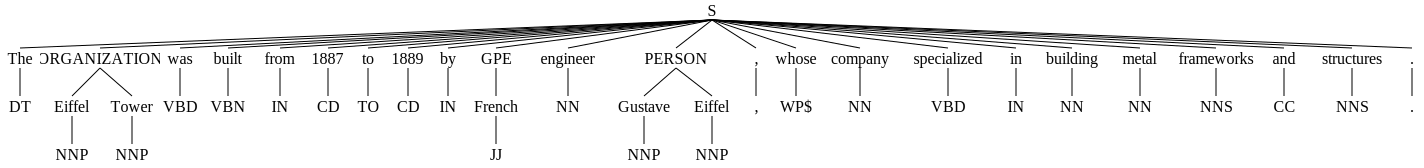

In [58]:
nltk.ne_chunk(tag_elements)

# One Hot Encoding

**Bag Of Word**

In [60]:
# Download SMSSpamCollection file  from :  https://archive.ics.uci.edu/dataset/228/sms+spam+collection
import pandas as pd
messages=pd.read_csv('/content/SMSSpamCollection',
                    sep='\t',names=["label","message"],encoding='latin1')

In [62]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [61]:
## Data cleaning and Preprocessing
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [64]:
corpus=[]
for i in range(0,len(messages)):
    review=re.sub('[^a-zA-z]',' ',messages['message'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [65]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

# Create Bag of Words

In [66]:
## Create the Bag OF Words model
from sklearn.feature_extraction.text import CountVectorizer
## for Binary BOW enable binary=True
cv=CountVectorizer(max_features=100,binary=True)

In [68]:
X= cv.fit_transform(corpus).toarray()

In [69]:
X.shape

(5572, 100)

In [70]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# N-Grams

In [71]:
cv.vocabulary_

{'go': 22,
 'great': 25,
 'got': 24,
 'wat': 90,
 'ok': 56,
 'free': 18,
 'win': 94,
 'text': 77,
 'txt': 85,
 'say': 67,
 'alreadi': 0,
 'think': 80,
 'hey': 28,
 'week': 92,
 'back': 3,
 'like': 38,
 'still': 73,
 'send': 69,
 'even': 15,
 'friend': 19,
 'prize': 62,
 'claim': 7,
 'call': 4,
 'mobil': 47,
 'co': 8,
 'home': 30,
 'want': 89,
 'today': 82,
 'cash': 6,
 'day': 12,
 'repli': 64,
 'www': 96,
 'right': 65,
 'thank': 78,
 'take': 75,
 'time': 81,
 'use': 87,
 'messag': 44,
 'oh': 55,
 'ye': 97,
 'make': 42,
 'way': 91,
 'feel': 16,
 'dont': 14,
 'miss': 46,
 'ur': 86,
 'tri': 84,
 'da': 11,
 'lor': 39,
 'meet': 43,
 'realli': 63,
 'get': 20,
 'know': 33,
 'love': 40,
 'let': 37,
 'work': 95,
 'wait': 88,
 'yeah': 98,
 'tell': 76,
 'pleas': 61,
 'msg': 49,
 'see': 68,
 'pl': 60,
 'need': 51,
 'tomorrow': 83,
 'hope': 31,
 'well': 93,
 'lt': 41,
 'gt': 26,
 'ask': 1,
 'morn': 48,
 'happi': 27,
 'sorri': 72,
 'give': 21,
 'new': 52,
 'find': 17,
 'year': 99,
 'later': 35,
 'pi

In [72]:
## Create the Bag OF Words model with NGram
from sklearn.feature_extraction.text import CountVectorizer
## for Binary BOW enable binary=True
cv=CountVectorizer(max_features=100,binary=True,ngram_range=(2,3)) # you can change ngram_range=(1,1) , (1,2) , (2,1) , (2,2)
X= cv.fit_transform(corpus).toarray()

In [73]:
cv.vocabulary_

{'free entri': 32,
 'claim call': 17,
 'call claim': 3,
 'free call': 31,
 'chanc win': 16,
 'txt word': 91,
 'let know': 55,
 'go home': 36,
 'pleas call': 70,
 'lt gt': 61,
 'want go': 97,
 'like lt': 56,
 'like lt gt': 57,
 'sorri call': 83,
 'call later': 11,
 'sorri call later': 84,
 'ur award': 92,
 'call custom': 4,
 'custom servic': 24,
 'cash prize': 15,
 'call custom servic': 5,
 'po box': 71,
 'tri contact': 89,
 'draw show': 28,
 'show prize': 81,
 'prize guarante': 75,
 'guarante call': 43,
 'valid hr': 95,
 'draw show prize': 29,
 'show prize guarante': 82,
 'prize guarante call': 76,
 'select receiv': 78,
 'privat account': 72,
 'account statement': 0,
 'call identifi': 6,
 'identifi code': 49,
 'code expir': 21,
 'privat account statement': 73,
 'call identifi code': 7,
 'identifi code expir': 50,
 'urgent mobil': 94,
 'call landlin': 10,
 'wat time': 98,
 'ur mob': 93,
 'gud ni': 45,
 'new year': 65,
 'send stop': 80,
 'get back': 34,
 'co uk': 20,
 'nice day': 66,
 'l

In [74]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**TF-IDF (Term Frequency - Inverse Document Frequency)**

TF = No. of rep of words in sentence / No. of Words in sentence

IDF = loge(No. of sentences / No. of sentences containing the word)

In [75]:
# Download SMSSpamCollection file  from :  https://archive.ics.uci.edu/dataset/228/sms+spam+collection
import pandas as pd
messages=pd.read_csv('/content/SMSSpamCollection',
                    sep='\t',names=["label","message"],encoding='latin1')

In [76]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wordlemmatize = WordNetLemmatizer()

In [77]:
corpus=[]
for i in range(0,len(messages)):
    review=re.sub('[^a-zA-z]',' ',messages['message'][i])
    review=review.lower()
    review=review.split()
    review=[wordlemmatize.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

**Create TF-IDF And NGrams**

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=100)
X= tfidf.fit_transform(corpus).toarray()

In [79]:
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000,formatter=dict(float=lambda X: "%.3g" % X))

In [80]:
X

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.434, 0, 0, 0.461, 0.544, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.456, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0.473, 0, 0, 0, 0, 0, 0, 0, 0.492, 0, 0, 0, 0, 0, 0, 0, 0.571, 0, 0, 0, 0, 0, 0],
       [0.465, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.485, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.574, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

**N-Grams**

In [81]:
tfidf = TfidfVectorizer(max_features = 100, ngram_range=(2,2))
X= tfidf.fit_transform(corpus).toarray()

In [82]:
tfidf.vocabulary_

{'free entry': 31,
 'claim call': 15,
 'call claim': 3,
 'free call': 30,
 'chance win': 14,
 'txt word': 89,
 'let know': 54,
 'please call': 66,
 'lt gt': 58,
 'want go': 97,
 'like lt': 55,
 'sorry call': 79,
 'call later': 8,
 'ur awarded': 90,
 'hi hi': 47,
 'call customer': 4,
 'customer service': 22,
 'guaranteed cash': 42,
 'cash prize': 13,
 'po box': 68,
 'trying contact': 86,
 'draw show': 27,
 'show prize': 78,
 'prize guaranteed': 72,
 'guaranteed call': 41,
 'valid hr': 95,
 'selected receive': 75,
 'private account': 70,
 'account statement': 0,
 'statement show': 80,
 'call identifier': 5,
 'identifier code': 50,
 'code expires': 19,
 'urgent mobile': 94,
 'call landline': 7,
 'wat time': 98,
 'give call': 34,
 'ur mob': 93,
 'gud ni': 44,
 'new year': 62,
 'send stop': 77,
 'co uk': 18,
 'gud mrng': 43,
 'nice day': 63,
 'lt decimal': 57,
 'decimal gt': 24,
 'txt nokia': 87,
 'good morning': 36,
 'ur friend': 92,
 'good night': 37,
 'reply call': 74,
 'last night': 53,

In [83]:
X

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0

**Word Embeddings :**


In natural language processing (NLP), word embedding is a tearm used for the representation of words for text analysis, typically in the form of a real-valued vector that encodes the meaning of the word such that the words that are closer in the vector space are expected to be similar in meaning.

Word Embedding type:

1. count of frequency

  a. OHE
  B. BOW
  C. TF-IDF

2.Deep learning Trained Model

  a. word2vec technique  --> CBOW , skipgram

**Word2Vec**

Word2vec is a technique for NLP published in 2013.The word2vec algorithm uses a neural network model to learn word associations from a large corpus of text.Once trained,such a model can detect synonymous words or suggest additional words for a partial sentences.As the name implies,word2vec represents each distinct word with a particular list of numbers called a vector.


**Word2vec**  --> Pretrained Model, Train Model from Scratch

CBOW, Skipgram





**Word2Vec Implementation**

In [84]:
!pip install gensim

In [85]:
import gensim

In [86]:
from gensim.models import Word2Vec, KeyedVectors

In [ ]:
## Reference  : https://stackoverflow.com/questions/46433778/import-googlenews-vectors-negative300-bin

In [87]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')
vec_king = wv['king']

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [88]:
vec_king

array([0.126, 0.0298, 0.00861, 0.14, -0.0256, -0.0361, 0.112, -0.198, 0.0513, 0.363, -0.242, -0.303, -0.178, -0.0249, -0.168, -0.17, 0.0347, 0.00522, 0.0464, 0.129, 0.137, 0.113, 0.0596, 0.137, 0.101, -0.177, -0.252, 0.0598, 0.342, -0.0311, 0.104, 0.0618, 0.125, 0.4, -0.322, 0.084, 0.0391, 0.00586, 0.0703, 0.173, 0.139, -0.231, 0.283, 0.143, 0.342, -0.0239, -0.11, 0.0332, -0.0547, 0.0153, -0.162, 0.158, -0.26, 0.0201, -0.163, 0.00136, -0.145, -0.0569, 0.043, -0.0247, 0.186, 0.447, 0.00958, 0.132, 0.0986, -0.186, -0.1, -0.134, -0.125, 0.283, 0.123, 0.0532, -0.178, 0.0859, -0.0219, 0.0205, -0.14, 0.0251, 0.139, -0.105, 0.139, 0.0889, -0.0752, -0.0214, 0.173, 0.0464, -0.266, 0.00891, 0.149, 0.0378, 0.238, -0.125, -0.218, -0.182, 0.0298, 0.0571, -0.0289, 0.0125, 0.0967, -0.231, 0.0581, 0.0669, 0.0708, -0.309, -0.215, 0.146, -0.428, -0.0094, 0.154, -0.0767, 0.289, 0.277, -0.000486, -0.137, 0.324, -0.246, -0.00304, -0.212, 0.125, 0.27, 0.204, 0.0825, -0.201, -0.16, -0.0378, -0.12, 0.115, -0.

In [89]:
vec_king.shape

(300,)

In [90]:
wv['cricket']

array([-0.367, -0.122, 0.285, 0.0815, 0.032, -0.032, 0.135, -0.273, 0.00946, -0.107, 0.248, -0.605, 0.0503, 0.299, 0.0957, 0.14, -0.0542, 0.291, 0.285, 0.151, -0.289, -0.0347, 0.0182, -0.393, 0.246, 0.252, -0.0986, 0.322, 0.449, -0.137, -0.234, 0.0413, -0.216, 0.17, 0.0256, 0.015, -0.0376, 0.00696, 0.4, 0.21, 0.118, -0.042, 0.234, 0.203, -0.187, -0.246, 0.312, -0.26, -0.107, 0.104, -0.18, 0.0571, -0.00742, -0.0559, 0.0762, -0.414, -0.365, -0.336, -0.154, -0.239, -0.373, 0.00227, -0.352, 0.0864, 0.127, 0.222, -0.0986, 0.109, 0.365, -0.0566, 0.0566, -0.109, -0.167, -0.0454, -0.2, -0.123, 0.132, -0.132, 0.103, -0.342, -0.157, 0.204, 0.0439, 0.244, -0.032, 0.32, -0.0442, 0.108, -0.0498, -0.00952, 0.246, -0.0559, 0.0408, -0.0178, -0.0295, 0.165, 0.504, -0.281, 0.0981, 0.0181, -0.184, 0.254, 0.226, 0.0164, 0.182, 0.139, 0.334, 0.14, 0.0146, -0.0289, -0.084, 0.15, 0.168, 0.229, 0.359, 0.123, -0.328, -0.156, 0.277, 0.0177, -0.146, -0.00452, -0.0447, 0.176, -0.375, 0.117, -0.14, 0.256, -0.196, 

In [91]:
wv.most_similar('cricket')

[('cricketing', 0.8372225761413574),
 ('cricketers', 0.8165745735168457),
 ('Test_cricket', 0.8094819188117981),
 ('Twenty##_cricket', 0.8068488240242004),
 ('Twenty##', 0.7624265551567078),
 ('Cricket', 0.75413978099823),
 ('cricketer', 0.7372578382492065),
 ('twenty##', 0.7316356897354126),
 ('T##_cricket', 0.7304614186286926),
 ('West_Indies_cricket', 0.6987985968589783)]

In [92]:
wv.most_similar('happy')

[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

In [93]:
wv.most_similar('hockey','sports')

[('Battochio', 0.48897773027420044),
 ('Ted_Donato', 0.46019503474235535),
 ('coach_Benoit_Groulx', 0.4598839581012726),
 ('Beskorowany', 0.45813873410224915),
 ('Siskins', 0.4557701349258423),
 ('Kitchener_Rangers', 0.4521059989929199),
 ('Jyri_Niemi', 0.451566606760025),
 ('Grubauer', 0.4503646790981293),
 ('Cullitons', 0.4500056207180023),
 ('Cunneyworth', 0.44906675815582275)]

In [94]:
vec = wv['king'] - wv['man'] + wv['woman']

In [95]:
vec

array([0.043, -0.178, -0.129, 0.115, 0.00269, -0.102, 0.196, -0.18, 0.0195, 0.41, -0.368, -0.396, -0.157, 0.00146, -0.093, -0.116, -0.0552, -0.108, 0.0791, 0.199, 0.239, 0.0634, -0.0217, 0, 0.0472, -0.218, -0.345, 0.0637, 0.316, -0.198, 0.0859, -0.0812, -0.0371, 0.316, -0.342, -0.0469, 0.0977, 0.084, -0.0972, 0.0518, -0.05, -0.221, 0.229, 0.126, 0.249, 0.021, -0.11, 0.0581, -0.0336, 0.13, 0.0242, 0.0348, -0.26, 0.242, -0.322, 0.0145, -0.159, -0.0837, 0.165, 0.00159, 0.31, 0.316, 0.00739, 0.241, 0.0491, -0.0986, 0.0291, 0.149, -0.0483, 0.236, 0.221, 0.125, -0.139, 0.154, 0.0719, 0.13, -0.106, 0.0601, 0.315, 0.11, 0.085, 0.0771, -0.0217, 0.0612, -0.19, 0.208, -0.163, 0.114, 0.201, 0.0607, 0.128, -0.311, -0.28, -0.156, 0.0415, 0.0988, 0.17, -0.0349, 0.208, -0.099, 0.00439, -0.0728, -0.0425, -0.409, -0.276, 0.164, -0.558, -0.202, 0.212, -0.0981, 0.231, 0.276, 0.168, -0.045, 0.172, -0.377, -0.00352, -0.302, 0.174, 0.33, 0.201, 0.118, -0.138, -0.107, 0.0862, 0.106, 0.145, 0.00305, 0.0181, 0.

In [96]:
wv.most_similar([vec])

[('king', 0.8449392318725586),
 ('queen', 0.7300517559051514),
 ('monarch', 0.645466148853302),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676352500916),
 ('prince', 0.5777117609977722),
 ('kings', 0.5613663792610168),
 ('sultan', 0.5376775860786438),
 ('Queen_Consort', 0.5344247817993164),
 ('queens', 0.5289887189865112)]